# **Think Before You Click: A Machine Learning Approach to Phishing URL Detection**

In today’s digital climate, where an increasing amount of people are using the Internet as a
platform to make online transactions, network, etc., cybersecurity has
risen to the forefront as a critical issue for individuals, businesses, and governments alike. Among
the vast variety of cyber threats, phishing remains one of the most prevalent and damaging attack
vectors, as agreed by the Information Commissioner’s Office, and while anyone can be the
victim of phishing, attackers are looking for high value returns, and therefore, large corporations
are often the most targete. They account for 75% of all attacks, in 2022, which led to $2.7
billion in losses as shown in the FBI’s Internet Crime Report.


The detection of phishing URLs has become an important area of research within the
cybersecurity community, as “traditional methods for detecting phishing websites, such as
blacklist-based approaches, heuristic analysis, and rule-based systems, have become increasingly ineffective in combating these evolving threats”, (Chy & Hasan, 2024). Machine
learning (ML) surfaced as a promising solution within cybersecurity,
offering the capability to detect phishing attempts with increased accuracy and adaptability.
These technologies enable the analysis of vast datasets to identify patterns and anomalies in
URLs.

The research questions that aim to be answered within this body of work are:
1. How will a hybrid machine learning model perform in terms of real-time efficiency
when compared to individually trained models?
2. Which Machine Learning models will have the highest accuracy in predicting the
authenticity of a Phishing URL?

The dataset used within this study was sourced from Kaggle:

https://www.kaggle.com/datasets/shashwatwork/web-page-phishing-detection-dataset?resource=download

This dataset includes 11,430 URLs, each with 87 extracted features, that is evenly distributed between phishing and legitimate classes (50% each), making it suitable for binary classification tasks. The dataset includes features extracted from three sources. 56 features are based on the structure and syntax of URLs, 24 features are extracted from the content of corresponding webpages and 7 features come from querying external services.

## Pre-Processing Stage

The initial stage of the implementation involved preprocessing the dataset, which consisted of 11,430 labelled URLs with 87 extracted features. Since the aim of the project was to develop a phishing URL detection system, only features that directly corresponded to the structure and syntax of URLs were selected for training. These accounted for 56 of the 87 features and were extracted from the original dataset using column filtering techniques, explicitly excluding the 24 features extracted from the content of the corresponding webpages and the 7 features obtained by querying external services. This design decision ensured that the detection model could operate without relying on additional web content or network requests.

To prepare the dataset for training, labels indicating phishing or legitimate URLs were assigned in binary format, where phishing was represented as 1 and legitimate as 0. The dataset was then split into training and testing subsets using the train_test_split() function, with 80% of the data allocated for training and 20% reserved for testing. The split was stratified using the stratify=y parameter to ensure the 50:50 class balance remained in both subsets.


In [ ]:
#importing necessary libraries and functions required within this project
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import files
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

#loading in the dataset
dataset = pd.read_csv('/content/dataset_phishing.csv', encoding='latin-1')

In [ ]:
#displaying basic info about the dataset
print("Dataset Loaded Successfully!")
print(dataset.info())  #checking column types and missing values

Dataset Loaded Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb

In [ ]:
#displaying 100 random rows to get a good understanding of the dataset
dataset.sample(100)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
236,http://www.ghbook.ir/index.php?lang=fa,38,13,0,3,0,0,1,0,0,...,1,1,1,0,-1,98458,0,0,4,legitimate
3305,http://www.my-car.info/,23,15,0,2,1,0,0,0,0,...,0,0,0,198,-1,0,0,0,1,legitimate
3414,http://cbu4397422nj.oa.r.appspot.com/jim@theji...,62,29,1,5,0,1,0,0,0,...,1,1,0,217,5626,2856134,0,1,5,phishing
4437,http://timeless-uptime.sr/,26,18,0,1,1,0,0,0,0,...,1,0,1,0,-1,0,0,1,0,phishing
9297,https://www.cranepi.com/en,26,15,0,2,0,0,0,0,0,...,1,1,0,1242,2409,1324300,0,0,3,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10563,https://sites.google.com/view/supayu/inicio,43,16,0,2,0,0,0,0,0,...,1,1,0,2976,8346,1,0,1,10,phishing
4371,http://www.madehow.com/Volume-1/Compact-Disc.html,49,15,0,3,2,0,0,0,0,...,1,1,0,2361,5308,55983,0,0,5,legitimate
10372,http://provk.aiq.ru/,20,12,0,2,0,0,0,0,0,...,1,1,0,117,7188,2888357,0,1,1,phishing
5660,http://www.rivasciudad.es/portal/home.jsp?codR...,51,18,0,3,0,0,1,0,0,...,1,1,1,0,-1,1068316,0,1,4,legitimate


In [ ]:
#defining only the relevant URL-based features
url_features = ["length_url", "length_hostname", "nb_dots", "nb_hyphens", "nb_at", "nb_qm", "nb_and", "nb_or", "nb_slash", "nb_www", "nb_com", "tld_in_path", "tld_in_subdomain", "nb_subdomains", "prefix_suffix", "shortening_service", "nb_redirection", "nb_percent", "ratio_digits_url", "ratio_digits_host", "domain_in_title", "whois_registered_domain", "domain_registration_length", "domain_age"]

#keeping only the selected URL features and the target variable ('status')
dataset = dataset[url_features + ["status"]]

#printing the updated dataset shape
print("Filtered Dataset Shape:", dataset.shape)

Filtered Dataset Shape: (11430, 25)


In [ ]:
#encoding the target variable so that'legitimate' = 0 and 'phishing' = 1
label_encoder = LabelEncoder()
dataset["status"] = label_encoder.fit_transform(dataset["status"])

#printing the value counts to ensure encoding was done correctly
print("Target variable encoding:")
print(dataset["status"].value_counts())

Target variable encoding:
status
0    5715
1    5715
Name: count, dtype: int64


In [ ]:
#defining the feature matrix (X) and the target variable (y) for model training
X = dataset.drop("status", axis=1)
y = dataset["status"]

#splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)     #setting the random_state to 42 to ensure reproducibility

#printing the shape of the splits
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (9144, 24)
Testing Set Shape: (2286, 24)


In [ ]:
#initialising the StandardScaler to normalise the feature values by removing the mean and scaling it
scaler = StandardScaler()

#fitting and transforming the training data by learning the scaling parameters from the training set
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Transform test data (no fitting)

#converting back to DataFrame for readability
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Feature scaling complete!")

Feature scaling complete!


## Implementation and Evaluation of Baseline Models

Following the pre-processing phase, three baseline machine learning models were implemented: Decision Tree, Random Forest, and Support Vector Machine. The Decision Tree was implemented using DecisionTreeClassifier(random_state=42), ensuring a simple structure that allows for early benchmarking. The Random Forest was initialised as RandomForestClassifier(n_estimators=100, random_state=42), as it utilised a collection of 100 decision trees to reduce variance and improve predictive stability. The SVM model was built using SVC(kernel='linear', probability=True, random_state=42). The use of a linear kernel ensured computational feasibility given the dimensionality of the data, while probability=True enabled the extraction of class probability estimates for following stacking operations.

In [ ]:
#initialising the baseline models with a fixed random state for reproducibility
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel='linear', probability=True, random_state=42)

#training the baseline models on the scaled training data
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

#implementing the function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Evaluation")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-Score:", f1_score(y_true, y_pred))

#evaluating baseline models
print("----- Baseline Model Evaluation -----")
evaluate_model(y_test, decision_tree_model.predict(X_test), "\nBaseline Decision Tree")
evaluate_model(y_test, random_forest_model.predict(X_test), "\nBaseline Random Forest")
evaluate_model(y_test, svm_model.predict(X_test), "\nBaseline SVM")

----- Baseline Model Evaluation -----

Baseline Decision Tree Evaluation
Accuracy: 0.8792650918635171
Precision: 0.8766290182450044
Recall: 0.8827646544181977
F1-Score: 0.8796861377506539

Baseline Random Forest Evaluation
Accuracy: 0.9282589676290464
Precision: 0.9223468507333908
Recall: 0.9352580927384077
F1-Score: 0.9287576020851434

Baseline SVM Evaluation
Accuracy: 0.8407699037620298
Precision: 0.8331907613344739
Recall: 0.8521434820647419
F1-Score: 0.842560553633218


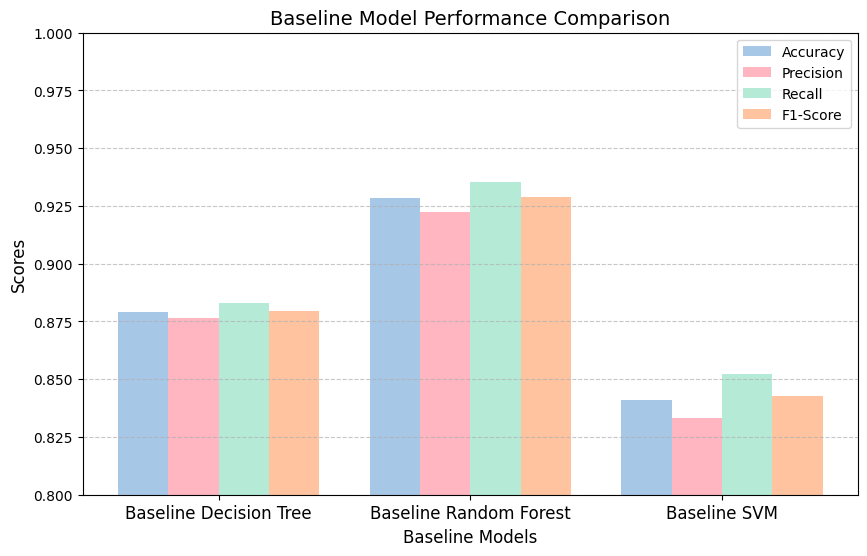

In [ ]:
#creating a bar graph to visualise the initial performance metrics of the models
models = ["Baseline Decision Tree", "Baseline Random Forest", "Baseline SVM"]

#setting the achieved baseline evaluation metrics
accuracy = [0.8793, 0.9283, 0.8408]
precision = [0.8766, 0.9223, 0.8332]
recall = [0.8828, 0.9353, 0.8521]
f1 = [0.8796, 0.9288, 0.8426]

#setting the bar width
bar_width = 0.2

x = np.arange(len(models))

#defining pretty colors for the bars
colors = ["#A7C7E7", "#FFB6C1", "#B5EAD7", "#FFC3A0"]

#creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width*1.5, accuracy, width=bar_width, label="Accuracy", color='#A7C7E7')
plt.bar(x - bar_width/2, precision, width=bar_width, label="Precision", color='#FFB6C1')
plt.bar(x + bar_width/2, recall, width=bar_width, label="Recall", color='#B5EAD7')
plt.bar(x + bar_width*1.5, f1, width=bar_width, label="F1-Score", color='#FFC3A0')

#setting the labels and formatting
plt.xlabel("Baseline Models", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.title("Baseline Model Performance Comparison", fontsize=14)
plt.xticks(ticks=x, labels=models, fontsize=12)
plt.ylim(0.8, 1.0)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

#displaying the bar graph for the baseline metrics for the models
plt.show()

## Optimisation and Evaluation of Baseline Models

To ensure fairness and to reduce overfitting, each baseline model was validated using Stratified K-Fold Cross-Validation, configured with 10 folds through the StratifiedKFold(n_splits=10) class. The cross_val_score() function was used to calculate the mean accuracy and standard deviation across all folds. This approach ensured that the class balance was maintained in each training-validation split and that the model's performance was consistent across multiple subsets of the data.

In [ ]:
#implementing Stratified K-Fold validation to ensure that the class distribution for each fold stays the same as the original dataset- using 10 as it provides a more detailed evalution
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)    #shuffle=True randomises the data before splitting into different folds

#creating a function to cross-validate the models
def cross_validate_model(model, X, y, model_name):
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    print(f"{model_name} Cross-Validation Results")
    print(f"Mean Accuracy: {scores.mean():.4f}")
    print(f"Standard Deviation: {scores.std():.4f}")

#applying the function to cross-validate the baseline models before hyper parameter tuning
print("----- Baseline Cross-Validation Results -----")
cross_validate_model(decision_tree_model, X_train, y_train, "\nBaseline Decision Tree")
cross_validate_model(random_forest_model, X_train, y_train, "\nBaseline Random Forest")
cross_validate_model(svm_model, X_train, y_train, "\nBaseline SVM")

----- Baseline Cross-Validation Results -----

Baseline Decision Tree Cross-Validation Results
Mean Accuracy: 0.8812
Standard Deviation: 0.0100

Baseline Random Forest Cross-Validation Results
Mean Accuracy: 0.9182
Standard Deviation: 0.0085

Baseline SVM Cross-Validation Results
Mean Accuracy: 0.8406
Standard Deviation: 0.0107


After validating the individual models, hyperparameter tuning was performed using GridSearchCV to find the optimal configurations for each model. For Decision Tree, the grid included parameters such as max_depth and min_samples_split. For Random Forest, the search considered combinations of n_estimators, max_depth, and min_samples_leaf. For SVM, the tuning stage confirmed the use of a linear kernel. Each search was performed with 5-fold cross-validation, and the best parameters were applied to retrain the optimised models. Performance metrics were re-evaluated after tuning, which showed improvement across all models, especially in the case of Random Forest and SVM.

In [ ]:
#performing hyperparameter tuning for the Decision Tree model - Gemini assisted with debugging, no prompts were given but suggested fixes were used.
decision_tree_params = {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}      #max_depth controls how deep the tree grows
decision_tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), decision_tree_params, cv=5, scoring='accuracy')    #setting up GridSearch so that it can find the best combination of hyperparamters
decision_tree_grid.fit(X_train, y_train)    #using GridSearch to find the best parameters
best_decision_tree = decision_tree_grid.best_estimator_     #finding the best Decision Tree model

#performing hyperparameter tuning for the Random Forest model
random_forest_params = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, None]}   #n_estimators is the number of trees in the forest and max_depth controls the maximum depth for each tree
random_forest_grid = GridSearchCV(RandomForestClassifier(random_state=42), random_forest_params, cv=5, scoring='accuracy')    #setting up GridSearch again to the find the best parameters for the Random Forest
random_forest_grid.fit(X_train, y_train)
best_random_forest = random_forest_grid.best_estimator_

#performing hyperparameter tuning for the SVM model
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}   #C controls the effectiveness of the regularisation to make sure it's not overfitting or underfitting to the data
svm_grid = GridSearchCV(SVC(probability=True, random_state=42), svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_

print("Optimised Decision Tree, Random Forest & SVM trained successfully!")

Optimised Decision Tree, Random Forest & SVM trained successfully!


In [ ]:
#printing out the achieved evaluation metrics of the optimised models
print("----- Optimised Model Evaluation -----")
evaluate_model(y_test, best_decision_tree.predict(X_test), "\nOptimised Decision Tree")
evaluate_model(y_test, best_random_forest.predict(X_test), "\nOptimised Random Forest")
evaluate_model(y_test, best_svm.predict(X_test), "\nOptimised SVM")

----- Optimised Model Evaluation -----

Optimised Decision Tree Evaluation
Accuracy: 0.8888888888888888
Precision: 0.8861859252823632
Recall: 0.8923884514435696
F1-Score: 0.8892763731473409

Optimised Random Forest Evaluation
Accuracy: 0.9251968503937008
Precision: 0.916095890410959
Recall: 0.9361329833770778
F1-Score: 0.926006057983557

Optimised SVM Evaluation
Accuracy: 0.9002624671916011
Precision: 0.8967909800520382
Recall: 0.9046369203849519
F1-Score: 0.9006968641114983


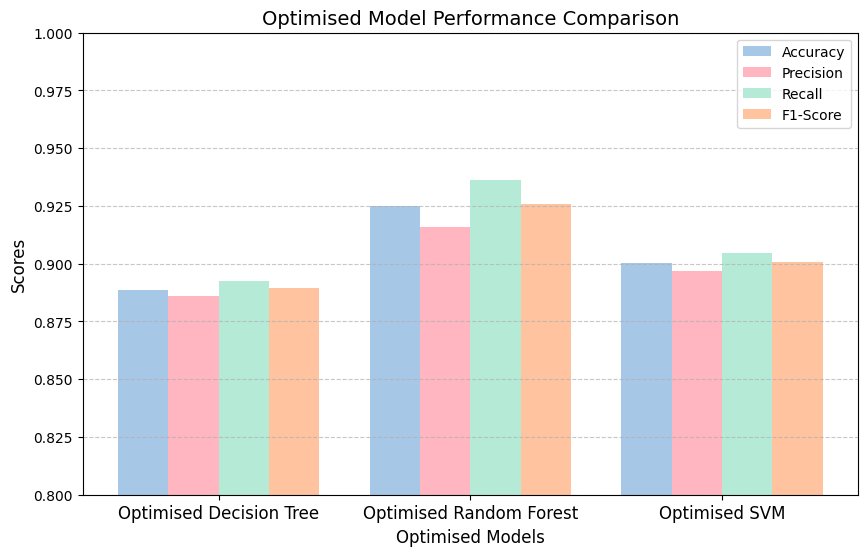

In [ ]:
#plotting a bar graph to visualise the optimised performance metrics for each of the models
models = ["Optimised Decision Tree", "Optimised Random Forest", "Optimised SVM"]

#setting the achieved optimised evaluation metrics
accuracy = [0.8888, 0.9251, 0.9003]
precision = [0.8862, 0.9161, 0.8968]
recall = [0.8924, 0.9361, 0.9046]
f1 = [0.8893, 0.9260, 0.9007]

bar_width = 0.2

x = np.arange(len(models))

#setting pretty colors instead of boring ones
colors = ["#A7C7E7", "#FFB6C1", "#B5EAD7", "#FFC3A0"]

#plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width*1.5, accuracy, width=bar_width, label="Accuracy", color='#A7C7E7')
plt.bar(x - bar_width/2, precision, width=bar_width, label="Precision", color='#FFB6C1')
plt.bar(x + bar_width/2, recall, width=bar_width, label="Recall", color='#B5EAD7')
plt.bar(x + bar_width*1.5, f1, width=bar_width, label="F1-Score", color='#FFC3A0')

#settings the labels and formatting
plt.xlabel("Optimised Models", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.title("Optimised Model Performance Comparison", fontsize=14)
plt.xticks(ticks=x, labels=models, fontsize=12)
plt.ylim(0.8, 1.0)  # Set the y-axis range for better visualization
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

#printing the graph
plt.show()

## Implementation and Evaluation of Hybrid Model

Now that the optimised individual classifiers were developed, the next stage involved implementing a hybrid model using a stacking method. The hybrid model was built using Random Forest and SVM as these were the best performing models, and XGBoost as the meta-classifier. XGBoost was selected due to its high predictive accuracy, and its ability to perform regularisation well, which helps prevent overfitting in hybrid models. This was implemented by generating class probability predictions from both base models using the .predict_proba() method. The predicted probability of the phishing class, was extracted using slicing rf_preds = best_rf.predict_proba(X_test)[:, 1] and svm_preds = best_svm.predict_proba(X_test)[:, 1]. These predictions were then joined to form a new feature matrix: stacked_features = np.column_stack((rf_preds, svm_preds)). This stacked feature matrix serves as the input to the meta-classifier, allowing it to learn higher-level patterns by utilising the combined strengths of the individual models to make more accurate final predictions.

In [ ]:
#generating stacked predictions from the optimised models - random forest and SVM as they were the best performing models. Gemini assisted with debugging, no prompts were given but suggested fixes were used.
random_forest_preds = best_random_forest.predict_proba(X_test)[:, 1]     #predicting the class probabilities for the test set using the optimisied random forest model - only the probability of the legitimate class is extracted here
svm_preds = best_svm.predict_proba(X_test)[:, 1]    #predicting the class probabilities for the test set using the optimisied SVM model - only the probability of the legitimate class is extracted here

#stacking the predictions as new feature set - combinied two arrays to create a two-feature matrix
stacked_features = np.column_stack((random_forest_preds, svm_preds))

#training the classifier - XGBoost
meta_model = XGBClassifier( eval_metric="logloss", random_state=42)     #logloss is used as this is a binary classification task
meta_model.fit(stacked_features, y_test)      #fitting the XGBoost classifier using the stacked preditions as features

#making final predictions with hybrid model to determine URL authenticity
stacked_preds = meta_model.predict(stacked_features)

print("Hybrid model trained successfully!")

Hybrid model trained successfully!


In [ ]:
#creating a function to cross-validate the hybrid model to evaluate how well it generalises - Gemini assisted with debugging, no prompts were given but suggested fixes were used.
def cross_validate_hybrid_model():
    hybrid_scores = []      #initialising an empty list to store the accuracy scores for each fold

    #iterating over the training and validation indices
    for train_index, test_index in kf.split(X_train, y_train):
        #training the optimised models on current training fold
        best_random_forest.fit(X_train.iloc[train_index], y_train.iloc[train_index])
        best_svm.fit(X_train.iloc[train_index], y_train.iloc[train_index])

        random_forest_preds_fold = best_random_forest.predict_proba(X_train.iloc[test_index])[:, 1]   #generating the predictions for the validation fold using the random forest
        svm_preds_fold = best_svm.predict_proba(X_train.iloc[test_index])[:, 1]                     #generating the same by usinf the SVM
        stacked_features_fold = np.column_stack((random_forest_preds_fold, svm_preds_fold))      #stacking the predictions into a new feature set for the hybrid model

        meta_model.fit(stacked_features_fold, y_train.iloc[test_index])   #training the XGBoost on stacked features
        stacked_preds_fold = meta_model.predict(stacked_features_fold)    #making predictions with the model using the stacked features

        #calculating the accuracy for this fold
        hybrid_scores.append(accuracy_score(y_train.iloc[test_index], stacked_preds_fold))

    #printing the overall cross-validation results for the hybrid model
    print("----- Optimised Hybrid Model Cross-Validation Results -----")
    print(f"Mean Accuracy: {np.mean(hybrid_scores):.4f}")
    print(f"Standard Deviation: {np.std(hybrid_scores):.4f}")

#running the cross-validation function for hybrid model
cross_validate_hybrid_model()

----- Optimised Hybrid Model Cross-Validation Results -----
Mean Accuracy: 0.9891
Standard Deviation: 0.0039


In [ ]:
#evaluating the final performance of the hybrid model
evaluate_model(y_test, stacked_preds, "Optimised Hybrid Model")

Optimised Hybrid Model Evaluation
Accuracy: 0.9676290463692039
Precision: 0.9659982563208369
Recall: 0.9693788276465442
F1-Score: 0.9676855895196507


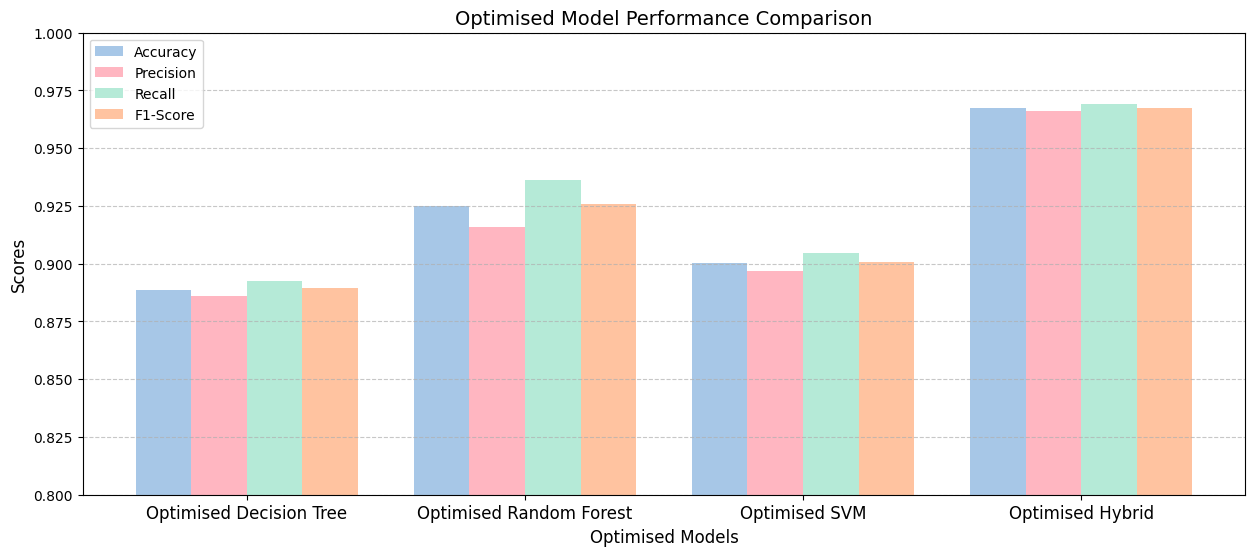

In [ ]:
#plotting a bar graph to visualise the performance metrics of the individual optimised models and the hybrid model
models = ["Optimised Decision Tree", "Optimised Random Forest", "Optimised SVM", "Optimised Hybrid"]

#setting the achieved evaluation metrics of the optimised and hybrid models
accuracy = [0.8888, 0.9251, 0.9003, 0.9676]
precision = [0.8862, 0.9161, 0.8968, 0.9659]
recall = [0.8924, 0.9361, 0.9046, 0.9693]
f1 = [0.8893, 0.9260, 0.9007, 0.9676]

bar_width = 0.2

x = np.arange(len(models))

#using pretty colours!
colors = ["#A7C7E7", "#FFB6C1", "#B5EAD7", "#FFC3A0"]

#plotting the bar graph
plt.figure(figsize=(15, 6))
plt.bar(x - bar_width*1.5, accuracy, width=bar_width, label="Accuracy", color='#A7C7E7')
plt.bar(x - bar_width/2, precision, width=bar_width, label="Precision", color='#FFB6C1')
plt.bar(x + bar_width/2, recall, width=bar_width, label="Recall", color='#B5EAD7')
plt.bar(x + bar_width*1.5, f1, width=bar_width, label="F1-Score", color='#FFC3A0')

#setting the labels and formatting
plt.xlabel("Optimised Models", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.title("Optimised Model Performance Comparison", fontsize=14)
plt.xticks(ticks=x, labels=models, fontsize=12)
plt.ylim(0.8, 1.0)  # Set the y-axis range for better visualization
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

#displaying the bar graph
plt.show()

## Evaluation of Real-Time Efficiency

Finally, the optimised individual models and the hybrid model were compared in terms of classification performance and inference time. To evaluate real-time efficiency, inference time was measured using Python’s time module.

In [ ]:
#creating a function to calculate the prediction time of each of the models to evaluate real-time efficieny in a corporate environment
def measure_time(model, X, model_name):
    start_time = time.time()      #recording the starting time before predications
    model.predict(X)
    end_time = time.time()      #recording the end time after the predictions are generated

    execution_time = (end_time - start_time) * 1000  #formula to calculate the inference time in milliseconds
    print(f"{model_name} Inference Time: {execution_time:.3f} ms")
    return execution_time

print("----- Real-Time Efficiency (Inference Time in ms) -----")

#applying the function to each of the optimised individual models to calculate the inference speed and stores it
decision_tree_time = measure_time(best_decision_tree, X_test, "\nOptimised Decision Tree")
random_forest_time = measure_time(best_random_forest, X_test, "Optimised Random Forest")
svm_time = measure_time(best_svm, X_test, "Optimised SVM")

#determing the inference time for the hybrid model
#generating the stacked predictions needed for the hybrid model
random_forest_preds = best_random_forest.predict_proba(X_test)[:, 1]
svm_preds = best_svm.predict_proba(X_test)[:, 1]
stacked_features = np.column_stack((random_forest_preds, svm_preds))

#applying the function to the hybrid model to calculate the inference time using the stacked features and stores it
hybrid_time = measure_time(meta_model, stacked_features, "Optimised Hybrid Model")

----- Real-Time Efficiency (Inference Time in ms) -----

Optimised Decision Tree Inference Time: 3.464 ms
Optimised Random Forest Inference Time: 79.863 ms
Optimised SVM Inference Time: 393.625 ms
Optimised Hybrid Model Inference Time: 5.022 ms


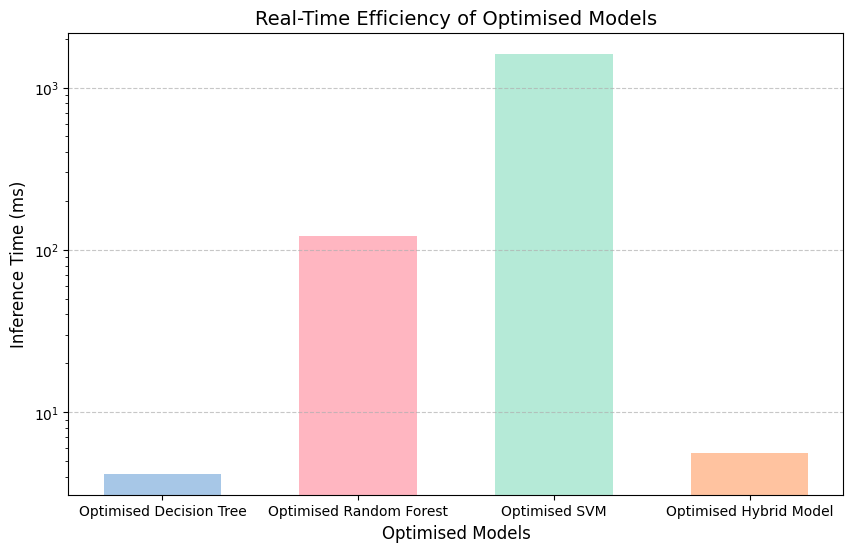

In [ ]:
#plotting a bar graph to visualise the inference speed of the individual optimised models and the hybrid model
models = ["Optimised Decision Tree", "Optimised Random Forest", "Optimised SVM", "Optimised Hybrid Model"]

#setting the achieved inference times in milliseconds for each of the models
inference_times = [4.171, 121.191, 1617.081, 5.600]

#using the pretty colours again
pastel_colors = ["#A7C7E7", "#FFB6C1", "#B5EAD7", "#FFC3A0"]

#plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, inference_times, color=pastel_colors, width=0.6)

#setting the labels and formatting
plt.xlabel("Optimised Models", fontsize=12)
plt.ylabel("Inference Time (ms)", fontsize=12)
plt.title("Real-Time Efficiency of Optimised Models", fontsize=14)
plt.yscale("log")  # Use log scale to handle large differences
plt.grid(axis="y", linestyle="--", alpha=0.7)

#displaying the bar graph
plt.show()

##References

In [ ]:
#References
#Ansari, A. (2017, April 30). Classifying data using Support Vector Machines(SVMs) in Python. GeeksforGeeks. https://www.geeksforgeeks.org/classifying-data-using-support-vector-machinessvms-in-python/

#Badrinarayan, M. (2024, March 26). Decision trees: Split Methods & Hyperparameter Tuning. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2024/03/decision-trees-split-methods-hyperparameter-tuning/

#Bharataameriya. (2025, March 5). Using XGBoost in PyTorch for enhanced model performance. Medium. https://medium.com/@bharataameriya/using-xgboost-in-pytorch-for-enhanced-model-performance-d4c9f9e10225

#Code, M. A. (2024, August 1). Mastering PyTorch inference time measurement - Mark Ai code. Medium. https://medium.com/@MarkAiCode/mastering-pytorch-inference-time-measurement-22da0eaebab7

#Dominguez, D. (2025, January 27). Understanding inference-time compute - Daniel Dominguez. Medium. https://dominguezdaniel.medium.com/understanding-inference-time-compute-c6c6ca2e17a8

#Haas, L. (2020). Hybrid Rule-Based Machine Learning With scikit-learn. Towardsdatascience.com. https://towardsdatascience.com/hybrid-rule-based-machine-learning-with-scikit-learn-9cb9841bebf2/

#How will I hybrid a random forest- support vector machine, in context with option pricing? (n.d.). Quora. Retrieved 28 April 2025, from https://www.quora.com/How-will-I-hybrid-a-random-forest-support-vector-machine-in-context-with-option-pricing

#Kaabar, S. (2024, August 5). Combining two machine learning models for enhanced predictions. All About Trading! https://abouttrading.substack.com/p/combining-two-machine-learning-models-e30

#Kharwal, A. (2024, November 4). Hybrid Machine Learning Model with Python. Thecleverprogrammer; Aman Kharwal. https://thecleverprogrammer.com/2024/11/04/hybrid-machine-learning-model-with-python/

#Koehrsen, W. (2018, January 10). Hyperparameter tuning the random forest in python - TDS archive - medium. TDS Archive. https://medium.com/data-science/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

#Mulani, S. (2022, August 3). Using StandardScaler() function to standardize python data. Digitalocean.com; DigitalOcean. https://www.digitalocean.com/community/tutorials/standardscaler-function-in-python

#Navlani, A. (2024). Decision Tree Classification in Python Tutorial. Datacamp.com. https://www.datacamp.com/tutorial/decision-tree-classification-python

#Pramod, O. (2023, January 29). Decision trees. Medium. https://medium.com/@ompramod9921/decision-trees-8e2391f93fa7

#Shafi, A. (2024). Random Forest Classification with Scikit-Learn. Datacamp.com. https://www.datacamp.com/tutorial/random-forests-classifier-python?dc_referrer=https%3A%2F%2Fwww.google.com%2F

#Shah, R. (2021, June 23). Tune hyperparameters with GridSearchCV. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/

#Siddharth, M. (2021, August 8). How to create a bar plot in Python: A step-by-step guide (updated 2025). Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/

#StratifiedKFold. (n.d.). Scikit-Learn. Retrieved 28 April 2025, from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

#tejashreeganesan Follow Improve. (2024, April 16). How to tune a Decision Tree in Hyperparameter tuning. GeeksforGeeks. https://www.geeksforgeeks.org/how-to-tune-a-decision-tree-in-hyperparameter-tuning/

#Tuychiev, B. (2023). Using XGBoost in Python Tutorial. Datacamp.com. https://www.datacamp.com/tutorial/xgboost-in-python

#vaibhavkumar303 Follow Improve. (2023, July 31). RBF SVM parameters in scikit learn. GeeksforGeeks. https://www.geeksforgeeks.org/rbf-svm-parameters-in-scikit-learn/

#Wong, K. J. (2023). Feature Encoding Techniques in Machine Learning with Python Implementation. Towardsdatascience.com. https://towardsdatascience.com/feature-encoding-techniques-in-machine-learning-with-python-implementation-dbf933e64aa/